In [1]:
import pandas as pd
import random
import os
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(777) # Seed 고정

In [3]:
train_df = pd.read_csv('/content/drive/MyDrive/LG Aimers 2기/데이터/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/LG Aimers 2기/데이터/test.csv')

In [4]:
train_df.index = pd.to_datetime(train_df["TIMESTAMP"])
test_df.index = pd.to_datetime(test_df["TIMESTAMP"])

train_df.head()

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2022-06-13 05:14:00,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN
2022-06-13 05:22:00,TRAIN_001,2,0.541819,2022-06-13 5:22,T050307,A_31,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN
2022-06-13 05:30:00,TRAIN_002,1,0.531267,2022-06-13 5:30,T050304,A_31,NaN,NaN,NaN,NaN,...,39.19,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN
2022-06-13 05:39:00,TRAIN_003,2,0.537325,2022-06-13 5:39,T050307,A_31,NaN,NaN,NaN,NaN,...,37.74,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN
2022-06-13 05:47:00,TRAIN_004,1,0.531590,2022-06-13 5:47,T050304,A_31,NaN,NaN,NaN,NaN,...,38.70,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN


In [5]:
# 컬럼 중 결측치 비율 90%이상인 것들 제외

del_list = []

for i in range(4, 2878):
    if train_df.iloc[:,i].isnull().sum() / len(train_df.iloc[:,i]) >=0.9:
        del_list.append(train_df.columns[i])
    else:
        continue

print(del_list)

['X_130', 'X_131', 'X_337', 'X_338', 'X_339', 'X_360', 'X_361', 'X_362', 'X_371', 'X_372', 'X_383', 'X_561', 'X_699', 'X_759', 'X_760', 'X_761', 'X_934', 'X_935', 'X_936', 'X_937', 'X_1219', 'X_1407', 'X_1523', 'X_1524', 'X_1525', 'X_1540', 'X_1707', 'X_1708', 'X_1709', 'X_1710', 'X_1969', 'X_1970', 'X_1971', 'X_1972', 'X_1973', 'X_1974', 'X_1975', 'X_1976', 'X_1977', 'X_1978', 'X_1979', 'X_1980', 'X_1981', 'X_1982', 'X_1983', 'X_1984', 'X_1985', 'X_1986', 'X_1987', 'X_1988', 'X_1989', 'X_1990', 'X_1991', 'X_1992', 'X_1993', 'X_1994', 'X_1995', 'X_1996', 'X_1997', 'X_1998', 'X_1999', 'X_2000', 'X_2001', 'X_2002', 'X_2003', 'X_2004', 'X_2005', 'X_2006', 'X_2007', 'X_2008', 'X_2009', 'X_2010', 'X_2011', 'X_2012', 'X_2013', 'X_2014', 'X_2015', 'X_2016', 'X_2029', 'X_2030', 'X_2031', 'X_2032', 'X_2033', 'X_2034', 'X_2035', 'X_2036', 'X_2037', 'X_2038', 'X_2039', 'X_2040', 'X_2069', 'X_2077', 'X_2085', 'X_2092', 'X_2540', 'X_2541', 'X_2542', 'X_2545', 'X_2548', 'X_2551', 'X_2628', 'X_2629',

In [6]:
train_df.drop(columns=del_list, inplace=True)
test_df.drop(columns=del_list, inplace=True)

In [7]:
train_x = train_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP', 'Y_Class', 'Y_Quality'])
train_y = train_df['Y_Class']

test_x = test_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP'])

In [8]:
train_x = train_x.fillna(0)
test_x = test_x.fillna(0)

In [9]:
from sklearn.preprocessing import RobustScaler

train_robust = train_x.iloc[:, 2:]

robust_scaler = RobustScaler()
fitted = robust_scaler.fit(train_robust)

train_robust = robust_scaler.transform(train_robust)
train_robust = pd.DataFrame(train_robust, columns=train_x.iloc[:, 2:].columns, index=train_x.index)
train_x_robust = pd.concat([train_x.iloc[:, 0:2], train_robust], axis=1)

train_x_robust.head()

,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2873,X_2874,X_2875
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2022-06-13 05:14:00,T050304,A_31,-1.0,-0.957895,0.0,-1.0,-1.0,0.0,-0.9,-1.0,...,1.000000,39.34,40.89,32.56,34.09,77.77,0.0,0.0,0.0,0.0
2022-06-13 05:22:00,T050307,A_31,-1.0,-0.957895,0.0,-1.0,-1.0,0.0,-0.9,-1.0,...,1.000000,38.89,42.82,43.92,35.34,72.55,0.0,0.0,0.0,0.0
2022-06-13 05:30:00,T050304,A_31,-1.0,-0.957895,0.0,-1.0,-1.0,0.0,-0.9,-1.0,...,1.000000,39.19,36.65,42.47,36.53,78.35,0.0,0.0,0.0,0.0
2022-06-13 05:39:00,T050307,A_31,-1.0,-0.957895,0.0,-1.0,-1.0,0.0,-0.9,-1.0,...,1.000000,37.74,39.17,52.17,30.58,71.78,0.0,0.0,0.0,0.0
2022-06-13 05:47:00,T050304,A_31,-1.0,-0.957895,0.0,-1.0,-1.0,0.0,-0.9,-1.0,...,0.997167,38.70,41.89,46.93,33.09,76.97,0.0,0.0,0.0,0.0


In [10]:
train_x_robust

,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2873,X_2874,X_2875
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2022-06-13 05:14:00,T050304,A_31,-1.0,-0.957895,0.0,-1.0,-1.0,0.0,-0.90,-1.0,...,1.000000,39.34,40.89,32.56,34.09,77.77,0.0,0.0,0.0,0.0
2022-06-13 05:22:00,T050307,A_31,-1.0,-0.957895,0.0,-1.0,-1.0,0.0,-0.90,-1.0,...,1.000000,38.89,42.82,43.92,35.34,72.55,0.0,0.0,0.0,0.0
2022-06-13 05:30:00,T050304,A_31,-1.0,-0.957895,0.0,-1.0,-1.0,0.0,-0.90,-1.0,...,1.000000,39.19,36.65,42.47,36.53,78.35,0.0,0.0,0.0,0.0
2022-06-13 05:39:00,T050307,A_31,-1.0,-0.957895,0.0,-1.0,-1.0,0.0,-0.90,-1.0,...,1.000000,37.74,39.17,52.17,30.58,71.78,0.0,0.0,0.0,0.0
2022-06-13 05:47:00,T050304,A_31,-1.0,-0.957895,0.0,-1.0,-1.0,0.0,-0.90,-1.0,...,0.997167,38.70,41.89,46.93,33.09,76.97,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-08 14:30:00,T100306,T_31,0.0,0.042105,0.0,0.0,0.0,0.0,0.10,0.0,...,0.000000,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
2022-09-08 22:38:00,T050304,A_31,-1.0,-0.957895,0.0,-1.0,-1.0,0.0,-0.90,-1.0,...,1.000000,49.47,53.07,50.89,55.10,66.49,1.0,0.0,0.0,0.0
2022-09-08 22:47:00,T050304,A_31,-1.0,-0.957895,0.0,-1.0,-1.0,0.0,-0.90,-1.0,...,0.997167,0.00,0.00,0.00,0.00,0.00,1.0,0.0,0.0,0.0


In [11]:
test_x.head()

,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2873,X_2874,X_2875
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2022-09-09 02:01:00,T100306,T_31,2.0,94.0,0.0,45.0,10.0,0.0,51.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-09 02:09:00,T100304,T_31,2.0,93.0,0.0,45.0,11.0,0.0,45.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-09 08:42:00,T100304,T_31,2.0,95.0,0.0,45.0,11.0,0.0,45.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-09 10:56:00,T010305,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,423.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-09 11:04:00,T010306,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,423.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
test_df_robust = test_x.iloc[:, 2:]
test_df_robust = robust_scaler.transform(test_df_robust)
test_df_robust = pd.DataFrame(test_df_robust, columns=test_x.iloc[:, 2:].columns, index=test_x.index)

In [13]:
test_x_robust = pd.concat([test_x.iloc[:, 0:2], test_df_robust], axis=1)

test_x_robust.head()

,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2873,X_2874,X_2875
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2022-09-09 02:01:00,T100306,T_31,0.0,0.031579,0.0,0.0,0.0,0.0,0.12,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-09 02:09:00,T100304,T_31,0.0,0.021053,0.0,0.0,0.1,0.0,0.00,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-09 08:42:00,T100304,T_31,0.0,0.042105,0.0,0.0,0.1,0.0,0.00,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-09 10:56:00,T010305,A_31,-1.0,-0.957895,0.0,-1.0,-1.0,0.0,-0.90,-1.0,...,1.1983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-09 11:04:00,T010306,A_31,-1.0,-0.957895,0.0,-1.0,-1.0,0.0,-0.90,-1.0,...,1.1983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# qualitative to quantitative
qual_col = ['LINE', 'PRODUCT_CODE']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_x[i])
    train_x_robust[i] = le.transform(train_x_robust[i])
    
    for label in np.unique(test_x[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test_x_robust[i] = le.transform(test_x_robust[i]) 
print('Done.')

Done.


In [16]:
from xgboost.sklearn import XGBClassifier


clf_best = XGBClassifier(max_depth=6, 
                         n_estimators=30, 
                         learning_rate=0.05, 
                         reg_lambda=1,
                         random_state=777)

clf_best.fit(train_x_robust, train_y)

XGBClassifier(learning_rate=0.05, max_depth=6, n_estimators=30,
              objective='multi:softprob', random_state=777)

In [17]:
train_preds = clf_best.predict(train_x_robust)

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("정확도:", accuracy_score(train_y, train_preds))
print("재현율:", recall_score(train_y, train_preds, average='macro'))
print("정밀도:", precision_score(train_y, train_preds, average='macro'))
print("F1 score:", f1_score(train_y, train_preds, average='macro'))

정확도: 0.9247491638795987
재현율: 0.8438879082082966
정밀도: 0.9668141592920354
F1 score: 0.8940499837832686


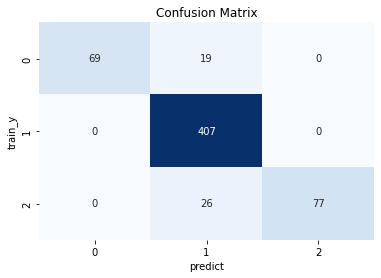

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(train_y, train_preds)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.ylabel("train_y")
plt.xlabel("predict")
plt.show()

In [19]:
preds = clf_best.predict(test_x_robust)
print('Done.')

Done.


In [20]:
submit = pd.read_csv('/content/drive/MyDrive/LG Aimers 2기/데이터/sample_submission.csv')

In [21]:
submit['Y_Class'] = preds

In [22]:
submit.to_csv('/content/drive/MyDrive/LG Aimers 2기/제출/baseline_submission16.csv', index=False)